In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
mseRand = np.load('data/trajectories_randomly.npy')
mseAnis = np.load('data/trajectories_anisotropic.npy')

mse = np.array([*mseRand, *mseAnis])

"""
0 Random - Representation - Reservoir
1 Random - Representation - Pool 
2 Random - Generalisation - Reservoir
3 Random - Generalisation - Pool
4 Anisotropic - Representation - Reservoir
5 Anisotropic - Representation - Pool 
6 Anisotropic - Generalisation - Reservoir
7 Anisotropic - Generalisation - Pool
"""

'\n0 Random - Representation - Reservoir\n1 Random - Representation - Pool \n2 Random - Generalisation - Reservoir\n3 Random - Generalisation - Pool\n4 Anisotropic - Representation - Reservoir\n5 Anisotropic - Representation - Pool \n6 Anisotropic - Generalisation - Reservoir\n7 Anisotropic - Generalisation - Pool\n'

In [3]:
mse.shape

(8, 7)

In [4]:
mseMeans = np.mean(mse, axis=1)
mseStd = np.std(mse, axis=1)

In [22]:
mseMeans

array([2.06517274e-06, 5.33804504e-03, 9.09230819e+18, 6.48405306e-03,
       3.60796311e-07, 3.29593166e-05, 8.25975911e+16, 3.97844801e-05])

In [25]:
np.log(1+mseMeans)

array([2.06517060e-06, 5.32384818e-03, 4.36539605e+01, 6.46312202e-03,
       3.60796246e-07, 3.29587734e-05, 3.89527569e+01, 3.97836887e-05])

In [6]:
mseStd

array([8.94609357e-07, 2.36418490e-03, 3.57221485e+18, 2.86920431e-03,
       1.52595548e-07, 1.43024380e-05, 3.07494632e+16, 1.68981326e-05])

In [7]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.family'] = 'CMU Sans Serif'
plt.rcParams['font.size'] = 14

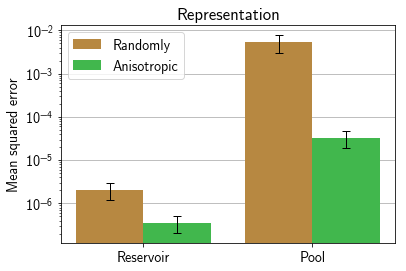

In [89]:
barWidth = 1

vals1 = np.array([mseMeans[0], mseMeans[1]])
vals2 = np.array([mseMeans[4], mseMeans[5]])
yerr1 = np.array([mseStd[0], mseStd[1]])
yerr2 = np.array([mseStd[4], mseStd[5]])

plt.bar([1,3.5], vals1, yerr=yerr1, width=barWidth, label='Random', color='#b78841', error_kw=dict(lw=1, capthick=1, capsize=4))
plt.bar([2,4.5], vals2, yerr=yerr2, width=barWidth, label='Anisotropic', color='#41b74d', error_kw=dict(lw=1, capthick=1, capsize=4))
plt.grid(axis='y')
#plt.xticks(inds, labels)
plt.xticks([1.5, 4], ['Reservoir', 'Pool'])
plt.yscale('log')
plt.title('Representation')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

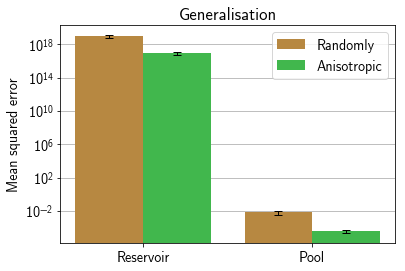

In [90]:
barWidth = 1

vals1 = np.array([mseMeans[2], mseMeans[3]])
vals2 = np.array([mseMeans[6], mseMeans[7]])
yerr1 = np.array([mseStd[2], mseStd[3]])
yerr2 = np.array([mseStd[6], mseStd[7]])

plt.bar([1,3.5], vals1, yerr=yerr1, width=barWidth, label='Random', color='#b78841', error_kw=dict(lw=1, capthick=1, capsize=4))
plt.bar([2,4.5], vals2, yerr=yerr2, width=barWidth, label='Anisotropic', color='#41b74d', error_kw=dict(lw=1, capthick=1, capsize=4))
plt.grid(axis='y')
#plt.xticks(inds, labels)
plt.xticks([1.5, 4], ['Reservoir', 'Pool'])
plt.yscale('log')
plt.title('Generalisation')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

In [55]:
def plotBar(means, stds, title):
    vals = np.array([means[0], means[1]])
    yerr = np.array([stds[0], stds[1]])
    inds = [1,2]
    labels=['Randomly', 'Anisotropic']

    bars = plt.bar(inds, vals, yerr=yerr, error_kw=dict(lw=1, capthick=1, capsize=4))
    plt.grid(axis='y')
    plt.xticks(inds, labels)
    plt.title(title)
    plt.ylabel('Mean squared error')
    bars[0].set_color('#b78841')
    bars[1].set_color('#41b74d')
    plt.yscale('log')
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.show()

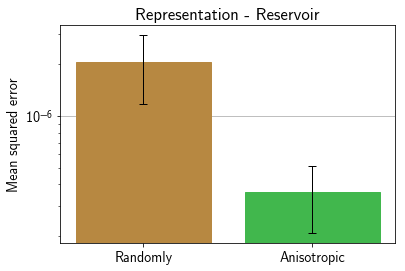

0.000610683223989594

In [56]:
# Representation - Reservoir
i = [0,4]
plotBar([mseMeans[i[0]], mseMeans[i[1]]], [mseStd[i[0]], mseStd[i[1]]], 'Representation - Reservoir')
stats.ttest_ind(mse[i[0]], mse[i[1]])[1]

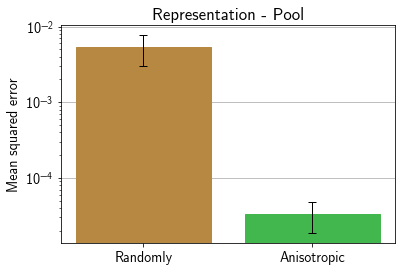

0.00013704474032359305

In [57]:
# Representation - Pool
i = [1,5]
plotBar([mseMeans[i[0]], mseMeans[i[1]]], [mseStd[i[0]], mseStd[i[1]]], 'Representation - Pool')
stats.ttest_ind(mse[i[0]], mse[i[1]])[1]

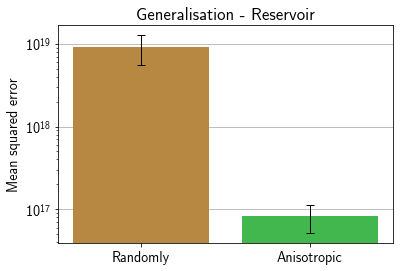

4.7428277611598e-05

In [58]:
# Generalisation - Reservoir
i = [2,6]
plotBar([mseMeans[i[0]], mseMeans[i[1]]], [mseStd[i[0]], mseStd[i[1]]], 'Generalisation - Reservoir')
stats.ttest_ind(mse[i[0]], mse[i[1]])[1]

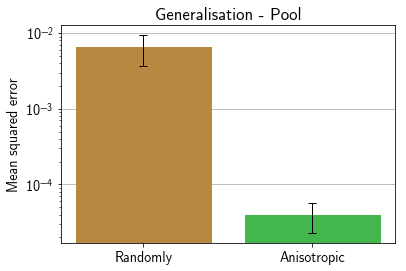

0.00013593101429457613

In [59]:
# Generalisation - Pool
i = [3,7]
plotBar([mseMeans[i[0]], mseMeans[i[1]]], [mseStd[i[0]], mseStd[i[1]]], 'Generalisation - Pool')
stats.ttest_ind(mse[i[0]], mse[i[1]])[1]